# 🇨🇦📉 What Happened to Canada–U.S. Trade After Trump's Tariffs?
**An Economic Data Analysis (2022–2025) Using Official Customs Trade Data**

## 🧭 Introduction

This notebook investigates how U.S. trade policy—particularly the return of Trump-era tariffs—has affected trade between Canada and the United States.

We analyze official monthly customs data from **January 2022 to April 2025** to:
- Examine changes in Canadian imports and exports with the U.S.
- Compare trends with Canada’s total global trade
- Visualize the trade balance shifts
- Estimate short-term impact on Canada’s economy

---

### 📊 Data Source
- **International merchandise trade by Principal Trading Partners (Monthly, x 1,000,000 CAD)**  
  [Statistics Canada - Table 12-10-0011-01](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1210001101)

*Note: Data is unadjusted and reported using the customs basis.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 12100011.csv to 12100011.csv


In [3]:
df = pd.read_csv('12100011.csv')

In [ ]:
df.info() #check data
df['REF_DATE'] = pd.to_datetime(df['REF_DATE']) #change month data to datetime

## 📦 Extracting Canada–U.S. Trade Data (2022–2025)

We begin by filtering the dataset to focus on trade between Canada and the United States, isolating both imports and exports.

In [5]:

#filter dataframe:
df_us = df[(df['Principal trading partners'] == 'United States') &
           (df['Seasonal adjustment'] == 'Unadjusted') &
           (df['Basis'] == 'Customs')&
           (df['REF_DATE'] >= '2022-01-01')]

#keep the columns we need
df_us = df_us[['REF_DATE','Trade','VALUE']]

#new dataframes for import and export
df_us_import = df_us[df_us['Trade'] == 'Import']
df_us_export = df_us[df_us['Trade'] == 'Export']

#rename the columns
df_us_import = df_us_import.rename(columns={'VALUE':'Import Value', 'REF_DATE':'Month'}).drop(['Trade'], axis = 1)
df_us_export = df_us_export.rename(columns={'VALUE':'Export Value', 'REF_DATE':'Month'}).drop(['Trade'], axis = 1)

#join to one datafram
df_ca_us_trade = pd.merge(df_us_import, df_us_export, on='Month', how = 'inner')

## 🌐 Extracting Canada's Total Trade Data (2022–2025)

We repeat the same filtering process to retrieve Canada’s total trade (with all countries), so we can later compare U.S. trade performance with the broader context.

In [16]:
# to create the Canada total trade dataset since 2022 to 2025
df_total = df[(df['Principal trading partners'] == 'All countries') &
       (df['Seasonal adjustment'] == 'Unadjusted') &
       (df['Basis'] == 'Customs') &
       (df['REF_DATE'] >= '2022-01-01')]

df_total = df_total[['REF_DATE','Trade','VALUE']]

df_total_import = df_total[df_total['Trade'] == 'Import']
df_total_export = df_total[df_total['Trade'] == 'Export']

df_total_import = df_total_import.rename(columns={'VALUE':'Import Value', 'REF_DATE':'Month'}).drop(['Trade'], axis = 1)
df_total_export = df_total_export.rename(columns={'VALUE':'Export Value', 'REF_DATE':'Month'}).drop(['Trade'], axis = 1)

df_ca_total_trade = pd.merge(df_total_import, df_total_export, on='Month', how = 'inner')



## 📈 Visualizing the Trade Trends

Let's explore how Canada's trade with the U.S. has evolved compared to overall trade.

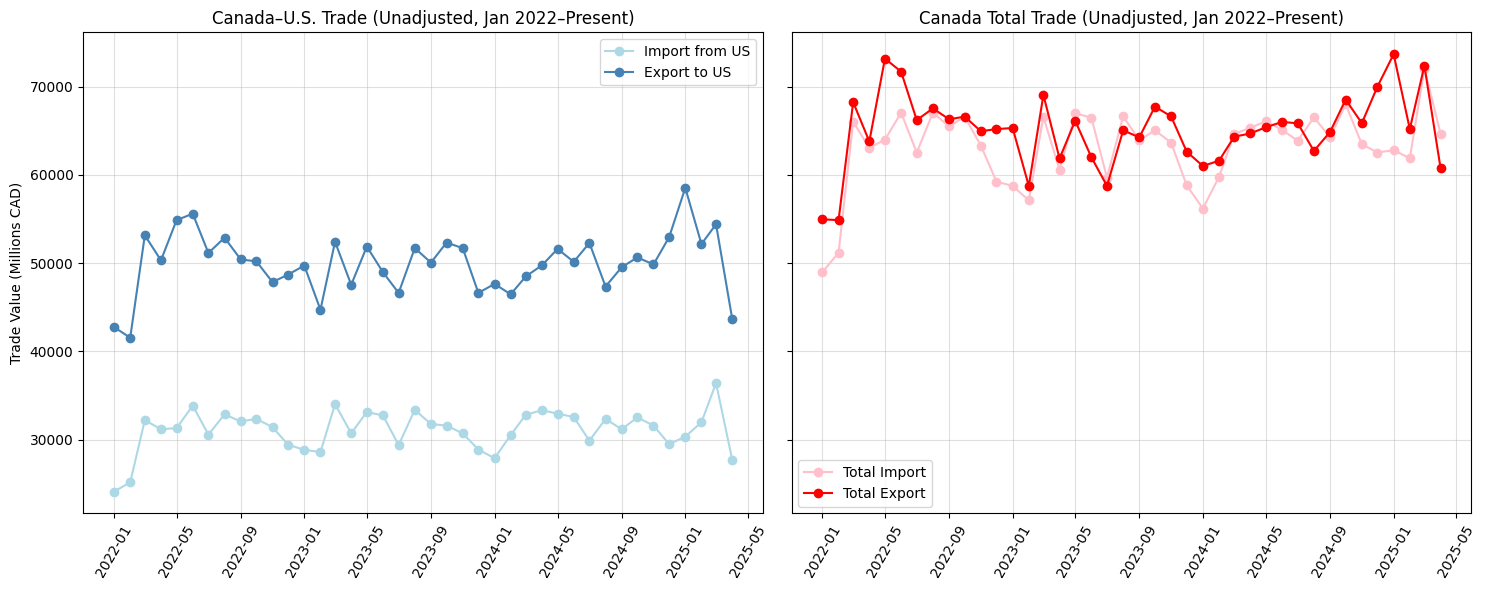

In [24]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# --- Chart 1: Canada–U.S. Trade ---
axes[0].plot(df_ca_us_trade['Month'], df_ca_us_trade['Import Value'], color='lightblue', label='Import from US', marker='o')
axes[0].plot(df_ca_us_trade['Month'], df_ca_us_trade['Export Value'], color='steelblue', label='Export to US', marker='o')
axes[0].set_title("Canada–U.S. Trade (Unadjusted, Jan 2022–Present)")
axes[0].set_ylabel("Trade Value (Millions CAD)")
axes[0].tick_params(axis='x', rotation=60)
axes[0].grid(True, alpha=0.4)
axes[0].legend()

# --- Chart 2: Canada Total Trade ---
axes[1].plot(df_ca_total_trade['Month'], df_ca_total_trade['Import Value'], color='pink', label='Total Import', marker='o')
axes[1].plot(df_ca_total_trade['Month'], df_ca_total_trade['Export Value'], color='red', label='Total Export', marker='o')
axes[1].set_title("Canada Total Trade (Unadjusted, Jan 2022–Present)")
axes[1].tick_params(axis='x', rotation=60)
axes[1].grid(True, alpha=0.4)
axes[1].legend()

# --- Final touches ---
plt.tight_layout()
plt.show()

## 🔢 Measuring the Impact: U.S. vs. the Rest of the World


We calculate the percentage change in Canada’s trade with the U.S. and other countries.
To do this, we compare April 2025 values with the average monthly trade from the three years prior to Trump’s return to the White House and renewed tariff threats.

In [9]:
#to Calculate the summary fo the US
us_pre_Trump_ex_avg = np.round(df_ca_us_trade[df_ca_us_trade['Month'] < '2025-01-01']['Export Value'].mean(), 1)
us_ex_apr2025 = df_ca_us_trade[df_ca_us_trade['Month'] == '2025-04']['Export Value'].values[0]
us_ex_drop = np.round(((us_ex_apr2025/us_pre_Trump_ex_avg)-1)*100, 1)

us_pre_Trump_im_avg = np.round(df_ca_us_trade[df_ca_us_trade['Month'] < '2025-01-01']['Import Value'].mean(), 1)
us_im_apr2025 = df_ca_us_trade[df_ca_us_trade['Month'] == '2025-04']['Import Value'].values[0]
us_im_drop = np.round(((us_im_apr2025/us_pre_Trump_im_avg)-1)*100, 1)

#to Calculate the summary fo total
total_pre_Trump_ex_avg = np.round(df_ca_total_trade[df_ca_total_trade['Month'] < '2025-01-01']['Export Value'].mean(), 1)
total_ex_apr2025 = df_ca_total_trade[df_ca_total_trade['Month'] == '2025-04']['Export Value'].values[0]
total_ex_drop = np.round(((total_ex_apr2025/total_pre_Trump_ex_avg)-1)*100, 1)

total_pre_Trump_im_avg = np.round(df_ca_total_trade[df_ca_total_trade['Month'] < '2025-01-01']['Import Value'].mean(), 1)
total_im_apr2025 = df_ca_total_trade[df_ca_total_trade['Month'] == '2025-04']['Import Value'].values[0]
total_im_drop = np.round(((total_im_apr2025/total_pre_Trump_im_avg)-1)*100, 1)

In [12]:
# to create a summery dataframe.
summary = {
    "Average(2022–2024)": [
        us_pre_Trump_ex_avg,
        us_pre_Trump_im_avg,
        total_pre_Trump_ex_avg,
        total_pre_Trump_im_avg
    ],
    "April2025": [
        us_ex_apr2025,
        us_im_apr2025,
        total_ex_apr2025,
        total_im_apr2025
    ],
    "Change(%)": [
        us_ex_drop,
        us_im_drop,
        total_ex_drop,
        total_im_drop
    ]}
index = [
    "Export to US",
    "Import from US",
    "Canada Total Export",
    "Canada Total Import"]
df_summary = pd.DataFrame(summary, index = index)
df_summary

,Average(2022–2024),April2025,Change(%)
Export to US,49729.2,43682.3,-12.2
Import from US,31031.1,27728.9,-10.6
Canada Total Export,64784.5,60771.3,-6.2
Canada Total Import,62895.0,64673.5,2.8


##📝 Conclusion

This analysis highlights how Canada’s trade landscape has shifted in the past four months, especially in relation to the U.S.
The results provide early indicators of economic adjustment as Canada navigates the new trade environment.



In [25]:
#to print the summary
print(f"📉 🇺🇲 Canada's exports to the U.S. dropped by {us_ex_drop}% in April 2025")
print(f"📉🌐 Meanwhile the total Canada's export dropped by {total_ex_drop}%")
print('--' * 40)
print(f"📦 Imports from the U.S. to Canada dropped by {us_im_drop} in April 2025%")
print(f"📉 🌐 Meanwhile the total Canada's total import vale increased by {total_im_drop}%")
print('--' * 40)
print(tabulate(df_summary, headers='keys', tablefmt='pretty'))




📉 🇺🇲 Canada's exports to the U.S. dropped by -12.2% in April 2025
📉🌐 Meanwhile the total Canada's export dropped by -6.2%
--------------------------------------------------------------------------------
📦 Imports from the U.S. to Canada dropped by -10.6 in April 2025%
📉 🌐 Meanwhile the total Canada's total import vale increased by 2.8%
--------------------------------------------------------------------------------
+---------------------+--------------------+-----------+-----------+
|                     | Average(2022–2024) | April2025 | Change(%) |
+---------------------+--------------------+-----------+-----------+
|    Export to US     |      49729.2       |  43682.3  |   -12.2   |
|   Import from US    |      31031.1       |  27728.9  |   -10.6   |
| Canada Total Export |      64784.5       |  60771.3  |   -6.2    |
| Canada Total Import |      62895.0       |  64673.5  |    2.8    |
+---------------------+--------------------+-----------+-----------+
